Importing the necessary package 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from numpy.linalg import eig
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
import os
from factor_analyzer import Rotator
import seaborn as sns
import json
import geojson
from scipy.stats import weibull_min
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import plotly.io as pio

In [2]:
df1 = pd.read_csv('Selected_variables.csv')

# Standard Scaling

In [3]:
df1 = pd.read_csv('Selected_variables.csv', dtype={'GEO_NAME': str})
columns_to_scale = df1.columns[1:]  

def standardScaler(data):
    '''axis=0 means along the column, axis=1 means working along the row.'''
    scaled_data = (data[columns_to_scale] - np.mean(data[columns_to_scale], axis=0)) / np.std(data[columns_to_scale], axis=0)
    
    # Combine the first column (GEO_NAME) with the scaled data
    scaled_df = pd.concat([data['GEO_NAME'], scaled_data], axis=1)
    
    return scaled_df

# Apply the scaling function to the selected columns
scaled_df = standardScaler(df1)
scaled_df = np.around(scaled_df, 2)
display(scaled_df)

# Calculate column means for the selected columns
column_means = np.mean(scaled_df[columns_to_scale], axis=0)
column_means[np.abs(column_means) < 1e-2] = 0
display(column_means)



,GEO_NAME,employed,unemployed,5 to 14 years,african american,all occupations,average total income of household in 2020 ($),between 7 a.m. and 7:59 a.m.,"black, n.o.s.","caucasian (white), n.o.s.",...,"postsecondary certificate, diploma or degree",public transit,renter,"south asian, n.o.s.",spending 30% or more of income on shelter costs,total visible minority population,under 5 years,average number of rooms per dwelling,2000 and before,65 years and over
0,59150307,0.33,0.27,1.46,-0.1,-0.38,0.02,0.20,-0.09,-0.63,...,-0.35,-0.99,-1.02,-0.15,-0.82,-0.88,0.68,1.37,0.15,0.31
1,59150308,0.85,-0.64,1.17,-0.1,0.60,0.04,-0.59,-0.09,-0.63,...,0.01,-0.70,-0.95,-0.15,-0.43,-0.86,2.93,0.92,0.58,0.65
2,59150309,1.00,-0.86,-0.83,-0.1,-0.44,0.17,-0.45,-0.09,0.18,...,-0.47,0.72,-0.53,-0.15,-0.77,-0.37,-0.45,0.22,-0.77,-0.57
3,59150310,1.38,0.85,0.52,-0.1,0.36,0.42,0.27,-0.09,0.38,...,-0.17,1.61,1.33,-0.15,1.25,-0.55,0.13,-1.11,-0.85,-1.50
4,59150311,-0.42,1.72,0.77,-0.1,-0.41,0.17,-0.21,-0.09,-0.63,...,-1.17,-0.46,-0.25,-0.15,-0.06,0.45,-1.40,0.61,0.01,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,59154192,0.47,-0.57,0.70,-0.1,0.60,-0.20,-0.13,-0.09,1.29,...,1.70,-1.48,-1.85,-0.15,-0.68,-1.30,0.48,-0.22,0.83,-0.19
1019,59154193,1.31,-0.49,0.57,-0.1,0.39,0.14,0.22,-0.09,-0.63,...,1.35,-0.71,0.33,-0.15,-0.73,-1.23,0.76,-0.86,1.13,-0.71
1020,59154194,-1.03,0.40,0.20,-0.1,0.23,0.16,-0.05,-0.09,-0.63,...,-1.20,0.47,0.31,4.68,-0.48,0.42,0.03,0.10,-0.17,-0.20
1021,59154195,-1.20,0.66,-0.20,-0.1,-0.12,0.23,1.18,-0.09,-0.63,...,-0.88,-0.64,-0.48,-0.15,-0.99,1.55,-0.92,0.48,-0.10,0.44


employed                                           0.0
unemployed                                         0.0
5 to 14 years                                      0.0
african american                                   0.0
all occupations                                    0.0
average total income of household in 2020 ($)      0.0
between 7 a.m. and 7:59 a.m.                       0.0
black, n.o.s.                                      0.0
caucasian (white), n.o.s.                          0.0
chinese                                            0.0
filipino                                           0.0
government transfers (%)                           0.0
indigenous identity                                0.0
major repairs needed                               0.0
median value of dwellings ($)                      0.0
movers                                             0.0
no certificate, diploma or degree                  0.0
not in the labour force                            0.0
one-mainta

In [4]:
#scaled_df.to_csv('scaled_df.csv')

# Covariance Matrix

In [5]:
def computeCovarianceMatrix(data):
    len_data = data.shape[0]

    data_subset = data.iloc[:, 1:]
    
    covariance = data_subset.T.dot(data_subset) / len_data
    return covariance

# Compute the covariance matrix for all columns except the first one
cov_mat = computeCovarianceMatrix(scaled_df)
cov_mat = np.around(cov_mat, 2)
cov_mat


,employed,unemployed,5 to 14 years,african american,all occupations,average total income of household in 2020 ($),between 7 a.m. and 7:59 a.m.,"black, n.o.s.","caucasian (white), n.o.s.",chinese,...,"postsecondary certificate, diploma or degree",public transit,renter,"south asian, n.o.s.",spending 30% or more of income on shelter costs,total visible minority population,under 5 years,average number of rooms per dwelling,2000 and before,65 years and over
employed,1.00,0.01,0.05,0.03,0.30,0.15,0.21,0.07,0.26,-0.55,...,0.47,0.10,0.37,0.02,0.08,-0.42,0.06,-0.45,0.02,-0.66
unemployed,0.01,1.00,-0.04,0.03,-0.18,0.14,0.06,0.04,0.08,-0.11,...,-0.10,0.22,0.27,0.02,0.06,-0.01,-0.02,-0.24,0.07,-0.17
5 to 14 years,0.05,-0.04,1.00,0.04,0.02,-0.01,0.04,0.02,0.02,0.03,...,0.18,-0.16,-0.15,-0.01,0.12,-0.05,0.12,0.13,-0.12,-0.11
african american,0.03,0.03,0.04,1.00,0.00,0.03,-0.02,-0.01,0.02,-0.08,...,0.03,0.04,0.05,0.08,0.01,-0.08,0.03,-0.06,0.04,-0.02
all occupations,0.30,-0.18,0.02,0.00,1.00,0.17,0.08,-0.01,0.06,-0.23,...,0.23,0.04,-0.03,0.01,0.05,-0.15,0.02,0.00,-0.01,-0.22
average total income of household in 2020 ($),0.15,0.14,-0.01,0.03,0.17,1.00,0.13,0.04,0.09,-0.07,...,-0.01,0.27,0.18,0.03,0.31,0.06,0.01,-0.23,0.03,-0.12
between 7 a.m. and 7:59 a.m.,0.21,0.06,0.04,-0.02,0.08,0.13,1.00,0.01,0.14,-0.21,...,0.16,-0.00,0.11,-0.01,-0.02,-0.22,0.05,-0.18,0.07,-0.07
"black, n.o.s.",0.07,0.04,0.02,-0.01,-0.01,0.04,0.01,1.00,0.02,-0.07,...,0.03,-0.03,0.07,0.03,0.04,-0.06,0.03,-0.10,-0.03,-0.05
"caucasian (white), n.o.s.",0.26,0.08,0.02,0.02,0.06,0.09,0.14,0.02,1.00,-0.36,...,0.31,-0.05,0.25,-0.00,0.14,-0.41,0.06,-0.29,0.10,-0.19
chinese,-0.55,-0.11,0.03,-0.08,-0.23,-0.07,-0.21,-0.07,-0.36,1.00,...,-0.50,-0.04,-0.56,-0.03,-0.07,0.76,-0.07,0.59,-0.29,0.35


# Plotting the Covariance Matrix as Heatmap

<Axes: >

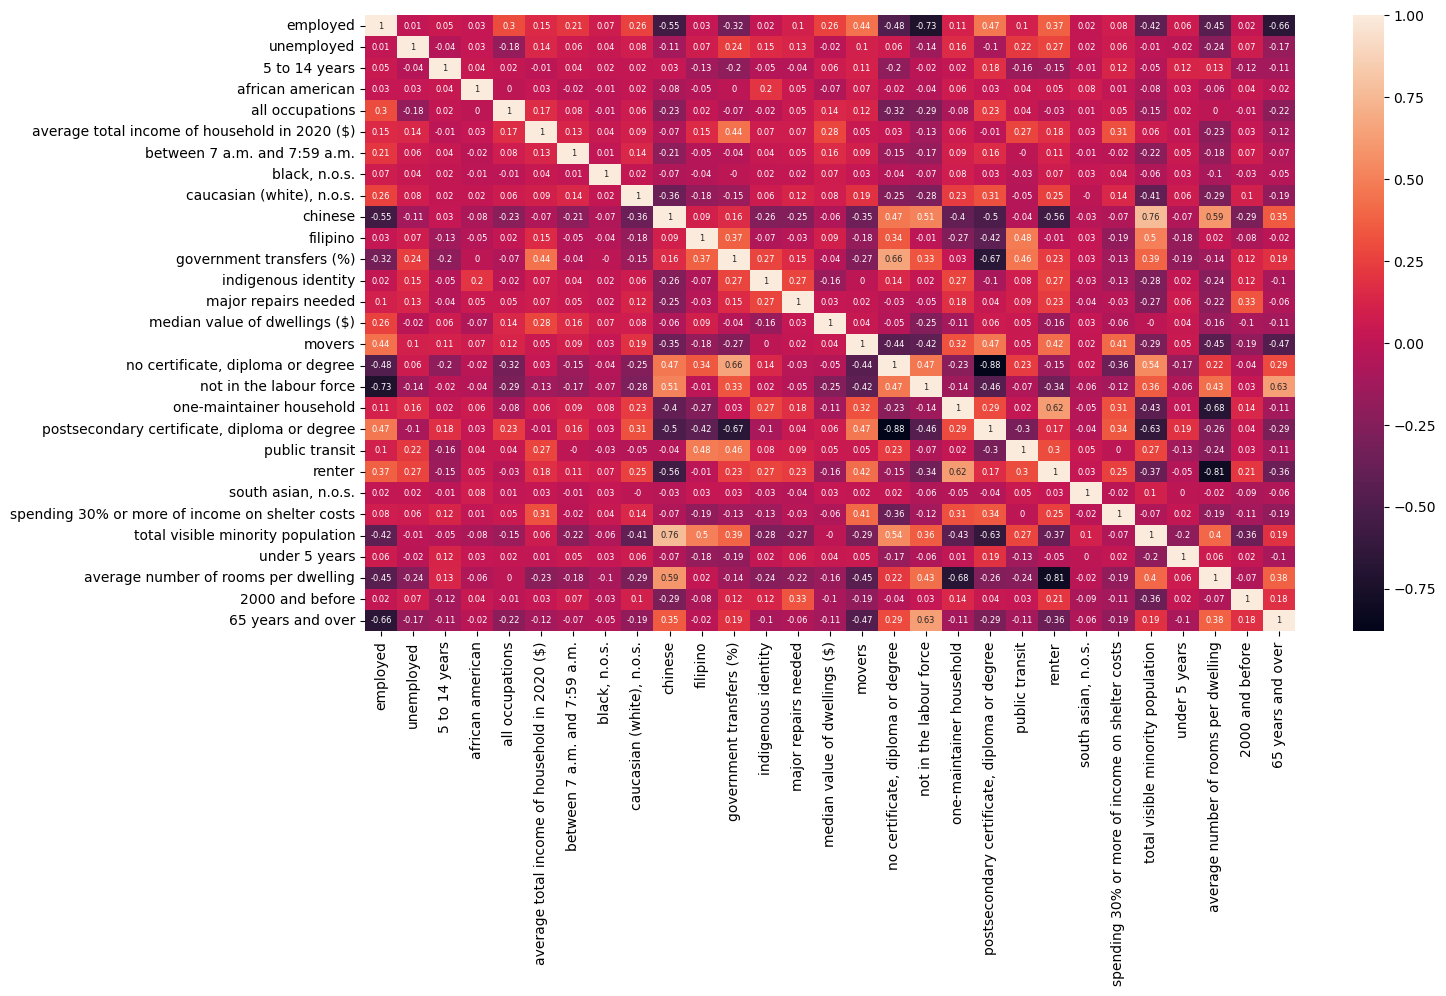

In [6]:
fig = plt.figure(figsize=(15, 8))
'''Annotate each cell with the numeric value using integer formatting'''
sn.heatmap(cov_mat.round(2), annot=True, fmt='g', annot_kws={"fontsize": 6})

# Eigen Decomposition of Covariance Matrix

In [7]:
eig_values, eig_vectors = np.linalg.eig(cov_mat)
if np.any(np.isclose(eig_values, 0)):
    print("Zero eigenvalues found. Handle the condition accordingly.")

print('\nNumber of Eigenvectors : %s ' % len(eig_vectors))
print('\nEigenvectors : \n\n%s' % eig_vectors)
print('\nEigenvalues : \n\n%s' % eig_values)


# Visualize above eigenvectors as a dataframe (or coefficient matrix)
eigenvec_df = pd.DataFrame(eig_vectors)
eigenvec_df.columns = ['eigvec_'+str(i+1) for i in range(0, len(eig_vectors))]
display(eigenvec_df.T)


Number of Eigenvectors : 29 

Eigenvectors : 

[[-2.93926359e-01 -1.36442660e-02  2.64771257e-01 -1.94212818e-01
   1.51702645e-01  6.02827720e-04 -1.44084296e-02 -6.06513841e-02
  -3.83687670e-02  6.81875407e-02  2.51696099e-01 -7.44095842e-01
  -1.39250215e-01  1.47082684e-01 -2.27930168e-02 -1.12617602e-01
   7.22759303e-02 -4.67441162e-02  5.24157527e-02 -2.32381759e-03
  -2.86358489e-01 -5.16813904e-02  2.83079894e-02  3.88165212e-02
  -3.56906170e-02 -3.73208795e-02  3.36750073e-02  1.52181125e-02
   1.21200079e-02]
 [-4.89210997e-02 -2.37742711e-01 -1.04385943e-02  1.24847208e-01
   1.88971811e-02  1.68592186e-01 -2.62597077e-01 -4.95305428e-02
  -3.65880816e-02  1.86191406e-02 -4.93893221e-02 -1.65080564e-01
  -1.53500349e-02  8.27433998e-02  8.70295816e-03  1.45525644e-02
  -7.01459962e-02  6.60049114e-02  3.34412125e-01 -3.92427310e-02
   3.75314956e-01  1.96793444e-01 -3.24975204e-01  2.19825877e-01
   3.33052372e-01  3.87835174e-01  2.61068069e-01  2.70813195e-02
   7.2633

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
eigvec_1,-0.293926,-0.048921,-0.040074,-0.034896,-0.109134,-0.051718,-0.107388,-0.040881,-0.190429,0.316841,...,-0.308668,0.022422,-0.242954,0.001977,-0.141495,0.306263,-0.064772,0.272908,-0.051755,0.235880
eigvec_2,-0.013644,-0.237743,0.174580,-0.042327,0.063780,-0.226863,-0.025253,-0.021424,-0.012852,0.102935,...,0.258597,-0.354753,-0.330487,-0.028571,0.026836,-0.071467,0.126261,0.295749,-0.109968,0.055469
eigvec_3,0.264771,-0.010439,0.047892,-0.077203,0.210825,0.205383,0.022240,0.010349,-0.070711,0.096781,...,-0.028652,0.221553,-0.096343,0.110429,0.065057,0.296886,-0.059647,0.017918,-0.323987,-0.295006
eigvec_4,-0.194213,0.124847,0.119672,0.012000,-0.266802,0.013967,-0.194507,0.037894,-0.057994,0.207735,...,0.036104,-0.004346,0.170397,0.033841,0.481594,0.192588,-0.076694,-0.116588,-0.331777,-0.036302
eigvec_5,0.151703,0.018897,-0.183806,0.114858,-0.133771,-0.574160,-0.243645,-0.081263,-0.120663,-0.091228,...,-0.077191,0.038596,0.111858,0.131511,-0.343893,0.016999,-0.151508,-0.028653,-0.126103,-0.233491
eigvec_6,0.000603,0.168592,0.393868,0.484266,-0.041765,0.087860,-0.001220,0.143742,-0.041025,0.057488,...,-0.085262,-0.067690,-0.124677,0.259159,-0.085387,-0.002639,0.397741,0.097205,-0.193086,-0.204213
eigvec_7,-0.014408,-0.262597,-0.011666,0.346303,0.466553,0.160304,-0.285627,-0.378270,-0.151306,-0.030369,...,0.085704,0.167557,0.004784,-0.031368,0.239491,0.024120,-0.068219,0.156560,0.138516,0.009570
eigvec_8,-0.060651,-0.049531,-0.014906,0.010576,-0.067874,-0.086093,-0.013627,-0.006528,-0.021104,0.418400,...,-0.275092,0.005174,-0.135441,0.048366,0.042610,-0.632387,-0.019072,-0.098515,-0.048289,-0.095069
eigvec_9,-0.038369,-0.036588,-0.052454,0.018827,-0.075136,0.132431,0.004616,-0.009102,0.025382,-0.144235,...,-0.450597,-0.038227,0.386471,-0.029870,-0.145651,0.097706,-0.028444,0.543490,-0.082734,-0.032461
eigvec_10,0.068188,0.018619,-0.023540,0.029259,-0.003648,-0.164543,0.003063,0.004529,-0.019508,0.194618,...,0.524997,-0.007919,0.342367,0.020460,0.015725,-0.199240,-0.021701,0.505635,-0.090219,-0.003523


# Sorting the eigenvalues in descending order

In [8]:
indexes = eig_values.argsort()[::-1]
eig_values = eig_values[indexes]
eig_vectors = eig_vectors[:, indexes]
sorted_eig_pairs = [(np.around(np.abs(eig_values[i]), 2),
                     eig_vectors[:, i]) for i in range(len(eig_values))]
print('\nSorted Eigen-pairs (descending order) :\n')

sorted_eigenValues = []
for i in range(0, len(sorted_eig_pairs)):
    print("eigenvec_{0} : {1}".format(str(i+1), str(sorted_eig_pairs[i][0])))
    sorted_eigenValues.append(sorted_eig_pairs[i][0])

print("\nTotal Variance (sum of all eigenvalues) : ",
      round(sum(sorted_eigenValues), 0))



Sorted Eigen-pairs (descending order) :

eigenvec_1 : 6.13
eigenvec_2 : 3.39
eigenvec_3 : 2.39
eigenvec_4 : 1.74
eigenvec_5 : 1.36
eigenvec_6 : 1.23
eigenvec_7 : 1.15
eigenvec_8 : 1.03
eigenvec_9 : 0.99
eigenvec_10 : 0.96
eigenvec_11 : 0.87
eigenvec_12 : 0.84
eigenvec_13 : 0.84
eigenvec_14 : 0.8
eigenvec_15 : 0.75
eigenvec_16 : 0.68
eigenvec_17 : 0.61
eigenvec_18 : 0.53
eigenvec_19 : 0.48
eigenvec_20 : 0.42
eigenvec_21 : 0.38
eigenvec_22 : 0.32
eigenvec_23 : 0.27
eigenvec_24 : 0.22
eigenvec_25 : 0.21
eigenvec_26 : 0.13
eigenvec_27 : 0.1
eigenvec_28 : 0.1
eigenvec_29 : 0.08

Total Variance (sum of all eigenvalues) :  29.0


# Decide the value of "K"

# Method-1 : Kaiser’s Stopping Rule

In [9]:
# Choosing all PCs which Eigenvalues are larger than 1
best_eig_pairs = [sorted_eig_pairs[i][0] for i in range(
    0, len(sorted_eig_pairs)) if sorted_eig_pairs[i][0] > 1.0]
print("\nAccording to Kaiser's Stopping Rule :")
print("Number of PCs to be considered for PCA is : {}".format(
    str(len(best_eig_pairs))))
print("Their Eigenvalues are : {}".format(str(best_eig_pairs)))


According to Kaiser's Stopping Rule :
Number of PCs to be considered for PCA is : 8
Their Eigenvalues are : [6.13, 3.39, 2.39, 1.74, 1.36, 1.23, 1.15, 1.03]


# Method-2 : Scree Plot

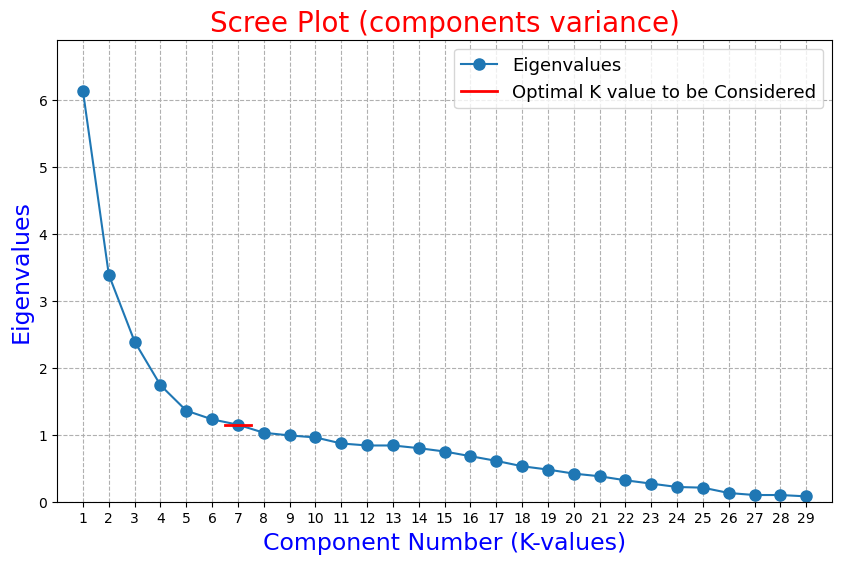

In [27]:
# Extract x and y values
x_values = range(1, len(sorted_eigenValues) + 1)
y_values = sorted_eigenValues

# Your code to create the graph
fig = plt.figure(figsize=(10, 6))
plt.title("Scree Plot (components variance)", color='Red', fontsize=20)
plt.xticks(np.arange(1, 30, 1))
plt.xlim(0, 30)
plt.ylim(0, 6.9)
plt.ylabel("Eigenvalues", fontsize=17, color='blue')
plt.xlabel("Component Number (K-values)", fontsize=17, color='blue')
plt.grid(linestyle='--')
plt.plot(x_values, y_values, linestyle='-',
         label="Eigenvalues", marker='o', markersize=8)
plt.plot([6.5, 7.5], [1.15, 1.15], color='red', linestyle='-',
         lw=2, label="Optimal K value to be Considered")
plt.legend(loc=1, prop={'size': 13})

# Save data to a CSV file
#data = np.column_stack((x_values, y_values))
#np.savetxt("scree_plot_data.csv", data, delimiter=',', header="Component Number, Eigenvalues", comments='')

plt.savefig("scree_plot.tif", format="tif")
plt.show()



Cumulative Variance Percentage : 
Component 1: 21.14%
Component 2: 32.83%
Component 3: 41.07%
Component 4: 47.07%
Component 5: 51.76%
Component 6: 56.0%
Component 7: 59.97%
Component 8: 63.52%
Component 9: 66.93%
Component 10: 70.24%
Component 11: 73.24%
Component 12: 76.14%
Component 13: 79.03%
Component 14: 81.79%
Component 15: 84.38%
Component 16: 86.72%
Component 17: 88.83%
Component 18: 90.66%
Component 19: 92.31%
Component 20: 93.76%
Component 21: 95.07%
Component 22: 96.17%
Component 23: 97.1%
Component 24: 97.86%
Component 25: 98.59%
Component 26: 99.03%
Component 27: 99.38%
Component 28: 99.72%
Component 29: 100.0%


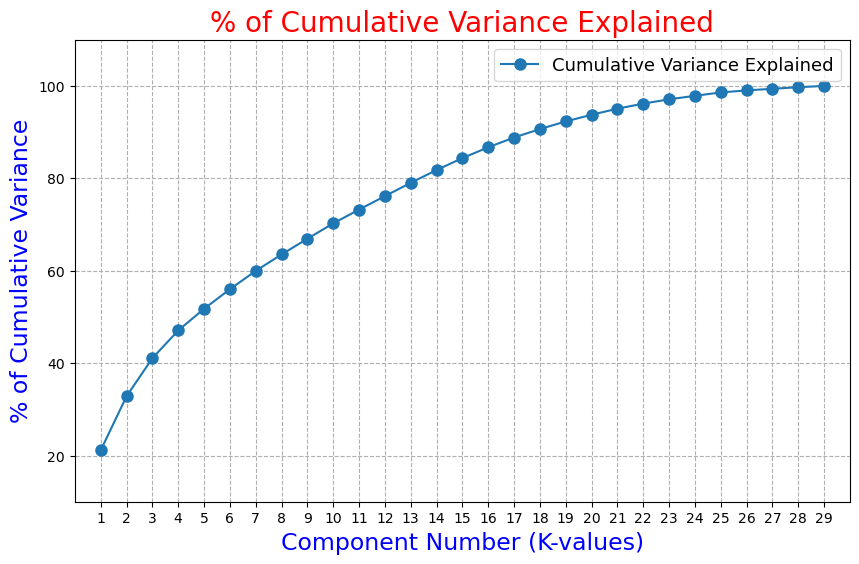

In [28]:
cumulative_variance = {}
ith_cumulative_variance = 0
for i in range(0, len(sorted_eig_pairs)):
    ith_explained_variance = sorted_eig_pairs[i][0] / sum(sorted_eigenValues)
    ith_cumulative_variance += ith_explained_variance
    cumulative_variance[str(i+1)] = round(ith_cumulative_variance * 100, 2)

print("\nCumulative Variance Percentage : ")
for component, variance in cumulative_variance.items():
    print("Component {}: {}%".format(component, variance))

# Extract x and y values for cumulative variance plot
x_values = range(1, 30)
y_values = sorted(list(cumulative_variance.values())[:30])

# Create the cumulative variance plot
fig = plt.figure(figsize=(10, 6))
plt.title("% of Cumulative Variance Explained", color='Red', fontsize=20)
plt.xticks(np.arange(1, 30, 1))
plt.xlim(0, 30)
plt.ylim(10, 110)
plt.ylabel("% of Cumulative Variance", fontsize=17, color='blue')
plt.xlabel("Component Number (K-values)", fontsize=17, color='blue')
plt.grid(linestyle='--')
plt.plot(x_values, y_values, linestyle='-',
         label="Cumulative Variance Explained", marker='o', markersize=8)
plt.legend(loc=1, prop={'size': 13})

# Save data for cumulative variance to a CSV file
#cumulative_data = np.column_stack((x_values, y_values))
#np.savetxt("cumulative_variance_data.csv", cumulative_data, delimiter=',', header="Component Number, Cumulative Variance", comments='')

plt.savefig("cumulative_variance_plot.tif", format="tif")
plt.show()


# Method-3 : Cumulative Variance Plot

## Projection matrix construction (K=15 from method- 3)

In [12]:
K = 15
projection_matrix = np.array(
    [list(np.hstack(i[1].reshape(29, 1))) for i in sorted_eig_pairs[:]])
projection_matrix = projection_matrix[:K]
print("\nProjection-Matrix Dimension ... ", projection_matrix.shape)
display(projection_matrix)



Projection-Matrix Dimension ...  (15, 29)


array([[-2.93926359e-01, -4.89210997e-02, -4.00735695e-02,
        -3.48962718e-02, -1.09134166e-01, -5.17180545e-02,
        -1.07387730e-01, -4.08809670e-02, -1.90429451e-01,
         3.16841450e-01,  1.28450382e-01,  1.64208695e-01,
        -5.98949525e-02, -8.90756380e-02, -5.01431551e-02,
        -2.58086294e-01,  2.94630443e-01,  2.85018079e-01,
        -2.14893936e-01, -3.08668398e-01,  2.24220619e-02,
        -2.42953566e-01,  1.97739496e-03, -1.41495358e-01,
         3.06263170e-01, -6.47720409e-02,  2.72907991e-01,
        -5.17549182e-02,  2.35880162e-01],
       [-1.36442660e-02, -2.37742711e-01,  1.74580224e-01,
        -4.23269228e-02,  6.37795045e-02, -2.26863116e-01,
        -2.52532214e-02, -2.14236139e-02, -1.28515849e-02,
         1.02935200e-01, -2.36362634e-01, -4.32469629e-01,
        -2.26409739e-01, -1.67549992e-01,  6.30458439e-03,
         6.99383842e-03, -2.55649935e-01,  8.01801595e-03,
        -1.69475481e-01,  2.58597036e-01, -3.54752732e-01,
        -3.30

# Projection Matrix as Dataframe

In [13]:
projection_matrix_df = pd.DataFrame(projection_matrix)
projection_matrix_df.columns = [str(i+1) for i in range(0, len(eig_vectors))]
projection_matrix_df = projection_matrix_df.set_index(
    [pd.Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])])

# Print the DataFrame
display(projection_matrix_df)
display(projection_matrix_df.T)

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
PC1,-0.293926,-0.048921,-0.040074,-0.034896,-0.109134,-0.051718,-0.107388,-0.040881,-0.190429,0.316841,...,-0.308668,0.022422,-0.242954,0.001977,-0.141495,0.306263,-0.064772,0.272908,-0.051755,0.235880
PC2,-0.013644,-0.237743,0.174580,-0.042327,0.063780,-0.226863,-0.025253,-0.021424,-0.012852,0.102935,...,0.258597,-0.354753,-0.330487,-0.028571,0.026836,-0.071467,0.126261,0.295749,-0.109968,0.055469
PC3,0.264771,-0.010439,0.047892,-0.077203,0.210825,0.205383,0.022240,0.010349,-0.070711,0.096781,...,-0.028652,0.221553,-0.096343,0.110429,0.065057,0.296886,-0.059647,0.017918,-0.323987,-0.295006
PC4,-0.194213,0.124847,0.119672,0.012000,-0.266802,0.013967,-0.194507,0.037894,-0.057994,0.207735,...,0.036104,-0.004346,0.170397,0.033841,0.481594,0.192588,-0.076694,-0.116588,-0.331777,-0.036302
PC5,0.151703,0.018897,-0.183806,0.114858,-0.133771,-0.574160,-0.243645,-0.081263,-0.120663,-0.091228,...,-0.077191,0.038596,0.111858,0.131511,-0.343893,0.016999,-0.151508,-0.028653,-0.126103,-0.233491
PC6,0.000603,0.168592,0.393868,0.484266,-0.041765,0.087860,-0.001220,0.143742,-0.041025,0.057488,...,-0.085262,-0.067690,-0.124677,0.259159,-0.085387,-0.002639,0.397741,0.097205,-0.193086,-0.204213
PC7,-0.014408,-0.262597,-0.011666,0.346303,0.466553,0.160304,-0.285627,-0.378270,-0.151306,-0.030369,...,0.085704,0.167557,0.004784,-0.031368,0.239491,0.024120,-0.068219,0.156560,0.138516,0.009570
PC8,0.052416,0.334412,0.268797,-0.242088,-0.140542,-0.072177,-0.007309,-0.357528,-0.048908,0.084419,...,-0.020728,0.092415,-0.026720,-0.624219,0.013488,0.027179,0.249121,0.107079,0.057306,-0.211090
PC9,-0.051681,0.196793,-0.007083,0.206137,-0.214128,0.018158,0.386475,-0.691526,0.245818,0.000445,...,0.032015,0.040525,-0.016097,0.338304,-0.020430,0.006731,-0.052138,0.002066,0.049105,0.101910
PC10,0.028308,-0.324975,0.153997,0.122278,0.117230,-0.015971,0.356280,-0.142042,-0.067404,0.008841,...,-0.058338,-0.115534,-0.024434,-0.407819,-0.149935,-0.041414,-0.339396,-0.138755,-0.335550,0.011478


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
1,-0.293926,-0.013644,0.264771,-0.194213,0.151703,0.000603,-0.014408,0.052416,-0.051681,0.028308,0.033675,0.012120,0.015218,-0.037321,-0.035691
2,-0.048921,-0.237743,-0.010439,0.124847,0.018897,0.168592,-0.262597,0.334412,0.196793,-0.324975,0.261068,0.007263,0.027081,0.387835,0.333052
3,-0.040074,0.174580,0.047892,0.119672,-0.183806,0.393868,-0.011666,0.268797,-0.007083,0.153997,0.285971,-0.302750,-0.503033,-0.150408,-0.385428
4,-0.034896,-0.042327,-0.077203,0.012000,0.114858,0.484266,0.346303,-0.242088,0.206137,0.122278,0.471109,0.235263,0.379385,-0.157185,0.003941
5,-0.109134,0.063780,0.210825,-0.266802,-0.133771,-0.041765,0.466553,-0.140542,-0.214128,0.117230,-0.161904,-0.123615,-0.090446,0.281471,0.069457
6,-0.051718,-0.226863,0.205383,0.013967,-0.574160,0.087860,0.160304,-0.072177,0.018158,-0.015971,-0.053956,0.109145,0.075055,0.129213,0.013056
7,-0.107388,-0.025253,0.022240,-0.194507,-0.243645,-0.001220,-0.285627,-0.007309,0.386475,0.356280,0.036009,-0.528747,0.240237,0.182375,0.080162
8,-0.040881,-0.021424,0.010349,0.037894,-0.081263,0.143742,-0.378270,-0.357528,-0.691526,-0.142042,0.292527,-0.131874,0.156961,0.176816,-0.111574
9,-0.190429,-0.012852,-0.070711,-0.057994,-0.120663,-0.041025,-0.151306,-0.048908,0.245818,-0.067404,-0.023395,0.499693,-0.174839,0.328968,-0.536288
10,0.316841,0.102935,0.096781,0.207735,-0.091228,0.057488,-0.030369,0.084419,0.000445,0.008841,-0.018311,0.075857,0.018101,0.009397,0.122766


# Varimax rotation method ( for representing the adjusted correlations between variables and componaents. considering the value higher than 0.3 )

In [14]:
pca = PCA()
components = projection_matrix_df.T

rotator = Rotator(method='varimax')
rotated_loadings = rotator.fit_transform(components)
rotated_loadings_df = pd.DataFrame(rotated_loadings, columns=[
                                   'PC{}'.format(i+1) for i in range(rotated_loadings.shape[1])])
rotated_loadings_df = rotated_loadings_df.where(
    rotated_loadings_df.abs() > 0.3, np.nan)
rotated_loadings_df = rotated_loadings_df.fillna(0)
display(rotated_loadings_df)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0.000000,0.000000,0.430380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.841890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.958775,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.966138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,-0.420757,0.000000,0.397646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,-0.673852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.906993,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.982867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.881370
9,0.318438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
#rotated_loadings_df.to_csv('varimax.csv')

# Variance percentage of first fifteen components

In [16]:
cumulative_variance = {}
for i in range(0, 15):
    ith_explained_variance = sorted_eig_pairs[i][0] / sum(sorted_eigenValues)
    ith_variance_percentage = round(ith_explained_variance * 100, 2)
    cumulative_variance[str(i + 1)] = ith_variance_percentage

print("\nVariance Percentage for the First Thirteen Components: ")
for component, variance in cumulative_variance.items():
    print("Component {}: {}%".format(component, variance))


Variance Percentage for the First Thirteen Components: 
Component 1: 21.14%
Component 2: 11.69%
Component 3: 8.24%
Component 4: 6.0%
Component 5: 4.69%
Component 6: 4.24%
Component 7: 3.97%
Component 8: 3.55%
Component 9: 3.41%
Component 10: 3.31%
Component 11: 3.0%
Component 12: 2.9%
Component 13: 2.9%
Component 14: 2.76%
Component 15: 2.59%


# Calculating W (weight) of each component
W=proportion of variance for each component/Total variance explained

In [17]:
summation_variance = 0
for i in range(0, 15):  
    ith_explained_variance = sorted_eig_pairs[i][0]
    summation_variance += ith_explained_variance

W = {}
for i in range(0, 15):
    ith_explained_variance = sorted_eig_pairs[i][0]
    ith_variance_percentage = ith_explained_variance / summation_variance
    W[str(i+1)] = ith_variance_percentage

data = []
for component, w in W.items():
    data.append(w)

df2= pd.DataFrame(data, columns=['weight'])
df2

,weight
0,0.250511
1,0.138537
2,0.097671
3,0.071107
4,0.055578
5,0.050266
6,0.046996
7,0.042092
8,0.040458
9,0.039232


# Result (sigma (Wi*PCi) )

In [18]:
result = np.nan_to_num(rotated_loadings_df) @ np.nan_to_num(df2)
result_df = pd.DataFrame(result, columns=['Result'])
display(result_df)

,Result
0,0.042036
1,-0.039566
2,-0.032913
3,0.048564
4,-0.004697
5,-0.037451
6,-0.031135
7,-0.039765
8,-0.027014
9,0.079772
